In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [330]:
df = pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/MUN_vs_MCI_17-1-2026.csv")

In [331]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Playing Time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Performance,Unnamed: 9,...,Per 90 Minutes,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
1,Manchester City,25,25.8,58.6,21,231,"1,890",21,42,33,...,2,1.57,3.57,1.9,3.48,1.88,1.54,3.42,1.77,3.31
2,Manchester Utd,26,26.3,53.9,21,231,"1,890",21,34,23,...,1.62,1.1,2.71,1.52,2.62,1.79,1.23,3.02,1.65,2.88


In [332]:
df1=df.iloc[:,:22]

In [333]:
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Playing Time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Performance,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Expected,Unnamed: 17,Unnamed: 18,Unnamed: 19,Progression,Unnamed: 21
0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP
1,Manchester City,25,25.8,58.6,21,231,"1,890",21,42,33,...,2,3,35,0,39.6,37.2,32.3,69.5,568,902
2,Manchester Utd,26,26.3,53.9,21,231,"1,890",21,34,23,...,2,4,29,1,37.7,34.7,25.8,60.5,407,865


In [334]:
df2=df.iloc[:,22:]

In [335]:
df2

,Per 90 Minutes,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
1,2,1.57,3.57,1.9,3.48,1.88,1.54,3.42,1.77,3.31
2,1.62,1.1,2.71,1.52,2.62,1.79,1.23,3.02,1.65,2.88


In [336]:
#df1=overall stats
#df2= Per 90 stats

In [337]:
df1.columns = df1.iloc[0]
df2.columns = df2.iloc[0]

df1 = df1.drop(index=0).reset_index(drop=True)
df2 = df2.drop(index=0).reset_index(drop=True)

In [338]:
df1

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP
0,Manchester City,25,25.8,58.6,21,231,"1,890",21,42,33,...,2,3,35,0,39.6,37.2,32.3,69.5,568,902
1,Manchester Utd,26,26.3,53.9,21,231,"1,890",21,34,23,...,2,4,29,1,37.7,34.7,25.8,60.5,407,865


In [339]:
df2

,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,2,1.57,3.57,1.9,3.48,1.88,1.54,3.42,1.77,3.31
1,1.62,1.1,2.71,1.52,2.62,1.79,1.23,3.02,1.65,2.88


In [340]:
#df1 Radar Chart

In [341]:
df1.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP'],
      dtype='object', name=0)

In [342]:
df1=df1.drop(["# Pl","Age","Starts","Min","90s","PK","PKatt","npxG+xAG"],axis=1)

In [343]:
df1.columns

Index(['Squad', 'Poss', 'MP', 'Gls', 'Ast', 'G+A', 'G-PK', 'CrdY', 'CrdR',
       'xG', 'npxG', 'xAG', 'PrgC', 'PrgP'],
      dtype='object', name=0)

In [344]:
df1.columns=["Team","Avg. Possesion","Matches Played","Goals","Assists","Goals+Assists","Non-Penalty Goals","Yellow Cards","Red Cards",
             "xG","Non Penalty xG","xAG","Progressive Carries","Progressive Passes"]

In [345]:
df1.columns

Index(['Team', 'Avg. Possesion', 'Matches Played', 'Goals', 'Assists',
       'Goals+Assists', 'Non-Penalty Goals', 'Yellow Cards', 'Red Cards', 'xG',
       'Non Penalty xG', 'xAG', 'Progressive Carries', 'Progressive Passes'],
      dtype='object')

In [346]:
df1

,Team,Avg. Possesion,Matches Played,Goals,Assists,Goals+Assists,Non-Penalty Goals,Yellow Cards,Red Cards,xG,Non Penalty xG,xAG,Progressive Carries,Progressive Passes
0,Manchester City,58.6,21,42,33,75,40,35,0,39.6,37.2,32.3,568,902
1,Manchester Utd,53.9,21,34,23,57,32,29,1,37.7,34.7,25.8,407,865


In [347]:
params=list(df1.columns)
params=params[1:]

In [348]:
params

['Avg. Possesion',
 'Matches Played',
 'Goals',
 'Assists',
 'Goals+Assists',
 'Non-Penalty Goals',
 'Yellow Cards',
 'Red Cards',
 'xG',
 'Non Penalty xG',
 'xAG',
 'Progressive Carries',
 'Progressive Passes']

In [349]:
ranges=[]
mci_values=[]
mun_values=[]


for col in params:
    col_values = pd.to_numeric(df1[col], errors='coerce')

    a = col_values.min()
    b = col_values.max()

    a = a - (a * 0.25)
    b = b + (b * 0.25)

    ranges.append((a, b))

for x in range(len(df1["Team"])):
    if df1["Team"][x]=="Manchester City":
        mci_values=df1.iloc[x].values.tolist()
    if df1["Team"][x]=="Manchester Utd":
        mun_values=df1.iloc[x].values.tolist()

mci_values=mci_values[1:]
mun_values=mun_values[1:]
values=[mci_values,mun_values]

In [350]:
ranges

[(40.425, 73.25),
 (15.75, 26.25),
 (25.5, 52.5),
 (17.25, 41.25),
 (42.75, 93.75),
 (24.0, 50.0),
 (21.75, 43.75),
 (0.0, 1.25),
 (28.275000000000002, 49.5),
 (26.025000000000002, 46.5),
 (19.35, 40.375),
 (305.25, 710.0),
 (648.75, 1127.5)]

In [351]:
values

[['58.6',
  '21',
  '42',
  '33',
  '75',
  '40',
  '35',
  '0',
  '39.6',
  '37.2',
  '32.3',
  '568',
  '902'],
 ['53.9',
  '21',
  '34',
  '23',
  '57',
  '32',
  '29',
  '1',
  '37.7',
  '34.7',
  '25.8',
  '407',
  '865']]

In [352]:
values = [
    [float(x) for x in team]
    for team in values
]

In [353]:
values

[[58.6,
  21.0,
  42.0,
  33.0,
  75.0,
  40.0,
  35.0,
  0.0,
  39.6,
  37.2,
  32.3,
  568.0,
  902.0],
 [53.9,
  21.0,
  34.0,
  23.0,
  57.0,
  32.0,
  29.0,
  1.0,
  37.7,
  34.7,
  25.8,
  407.0,
  865.0]]

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

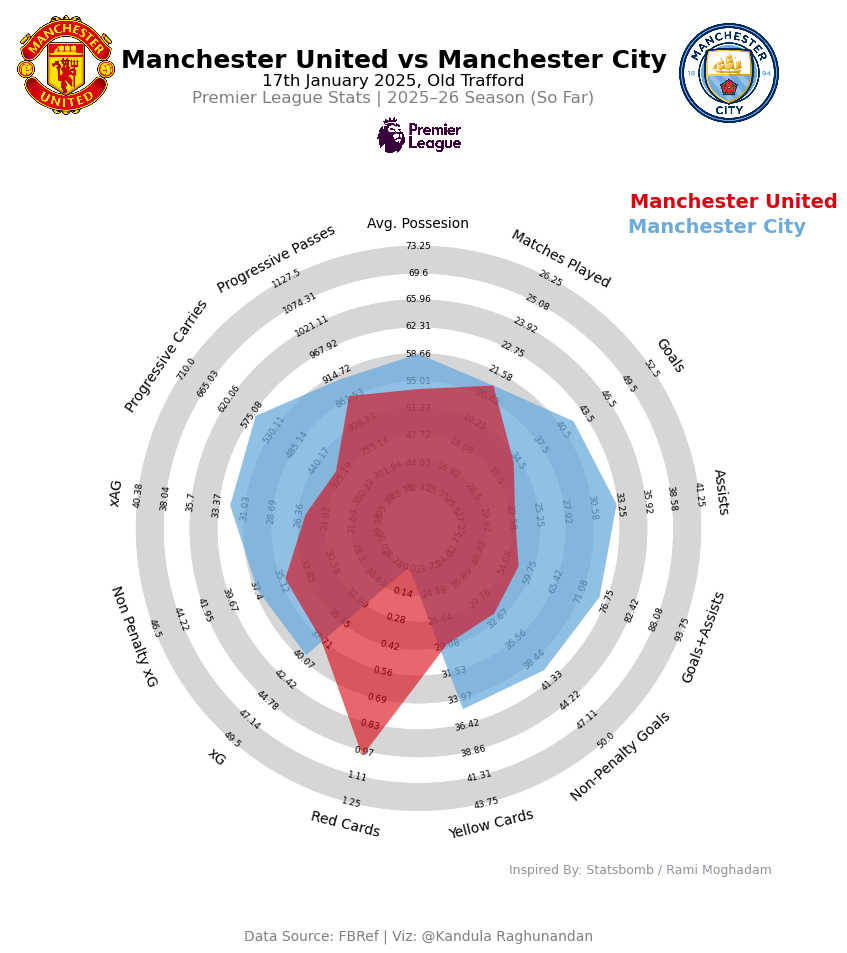

In [354]:
radar=Radar()
fig,ax=radar.plot_radar(ranges=ranges,params=params,values=values,radar_color=["#6CABDD","#DA020E"],alphas=[.75,.6],compare=True)

fig.text(0.5, 0.94,
         "Manchester United vs Manchester City",
         ha="center",
         fontsize=18,
         fontweight="bold")

fig.text(0.5, 0.922,
         "17th January 2025, Old Trafford",
         ha="center",
         fontsize=12,
         color="black")

fig.text(0.5, 0.905,
         "Premier League Stats | 2025–26 Season (So Far)",
         ha="center",
         fontsize=12,
         color="gray")

# Left team
fig.text(0.67, 0.8,
         "Manchester United",
         ha="center",
         fontsize=14,
         fontweight="bold",
         color="#DA020E")


# Right team
fig.text(0.662, 0.775,
         "Manchester City",
         ha="center",
         fontsize=14,
         fontweight="bold",
         color="#6CABDD")

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Manchester United.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Manchester City.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/PREM LOGO (2).png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.2, xy=(0, 1.08))
add_logo(ax, away_logo, zoom=0.2, xy=(0.94, 1.07))
add_logo(ax,league_logo,zoom=0.03, xy=(0.5,0.99))

plt.text(
    0.5, -0.05, "Data Source: FBRef | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

fig.savefig("C:/Users/K Raghunandan/Analyst/Results/MUN_vs_MCI_17-01-2025.png", bbox_inches='tight')

In [355]:
#df2 Radar

In [356]:
df2.columns

Index(['Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG'],
      dtype='object', name=0)

In [357]:
df2=df2.drop(["G+A-PK","npxG+xAG"],axis=1)

In [358]:
df2.columns=["Goals","Assists","Goals + Assists", "Non-Penalty Goals","xG","xAG","xG + xAG","Non-Penalty xG"]

In [359]:
df2.columns

Index(['Goals', 'Assists', 'Goals + Assists', 'Non-Penalty Goals', 'xG', 'xAG',
       'xG + xAG', 'Non-Penalty xG'],
      dtype='object')

In [360]:
df2

,Goals,Assists,Goals + Assists,Non-Penalty Goals,xG,xAG,xG + xAG,Non-Penalty xG
0,2,1.57,3.57,1.9,1.88,1.54,3.42,1.77
1,1.62,1.1,2.71,1.52,1.79,1.23,3.02,1.65


In [361]:
df2.insert(0, 'Team', ['Manchester City', 'Manchester Utd'])

In [362]:
df2

,Team,Goals,Assists,Goals + Assists,Non-Penalty Goals,xG,xAG,xG + xAG,Non-Penalty xG
0,Manchester City,2,1.57,3.57,1.9,1.88,1.54,3.42,1.77
1,Manchester Utd,1.62,1.1,2.71,1.52,1.79,1.23,3.02,1.65


In [363]:
params=list(df2.columns)
params=params[1:]

In [364]:
params

['Goals',
 'Assists',
 'Goals + Assists',
 'Non-Penalty Goals',
 'xG',
 'xAG',
 'xG + xAG',
 'Non-Penalty xG']

In [365]:
ranges=[]
mci_values=[]
mun_values=[]


for col in params:
    col_values = pd.to_numeric(df2[col], errors='coerce')

    a = col_values.min()
    b = col_values.max()

    a = a - (a * 0.25)
    b = b + (b * 0.25)

    ranges.append((a, b))

for x in range(len(df2["Team"])):
    if df2["Team"][x]=="Manchester City":
        mci_values=df2.iloc[x].values.tolist()
    if df2["Team"][x]=="Manchester Utd":
        mun_values=df2.iloc[x].values.tolist()

mci_values=mci_values[1:]
mun_values=mun_values[1:]
values=[mci_values,mun_values]

In [366]:
ranges

[(1.215, 2.5),
 (0.8250000000000001, 1.9625000000000001),
 (2.0324999999999998, 4.4624999999999995),
 (1.1400000000000001, 2.375),
 (1.3425, 2.3499999999999996),
 (0.9225, 1.925),
 (2.265, 4.275),
 (1.2374999999999998, 2.2125)]

In [367]:
values

[['2', '1.57', '3.57', '1.9', '1.88', '1.54', '3.42', '1.77'],
 ['1.62', '1.1', '2.71', '1.52', '1.79', '1.23', '3.02', '1.65']]

In [368]:
values = [
    [float(x) for x in team]
    for team in values
]

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

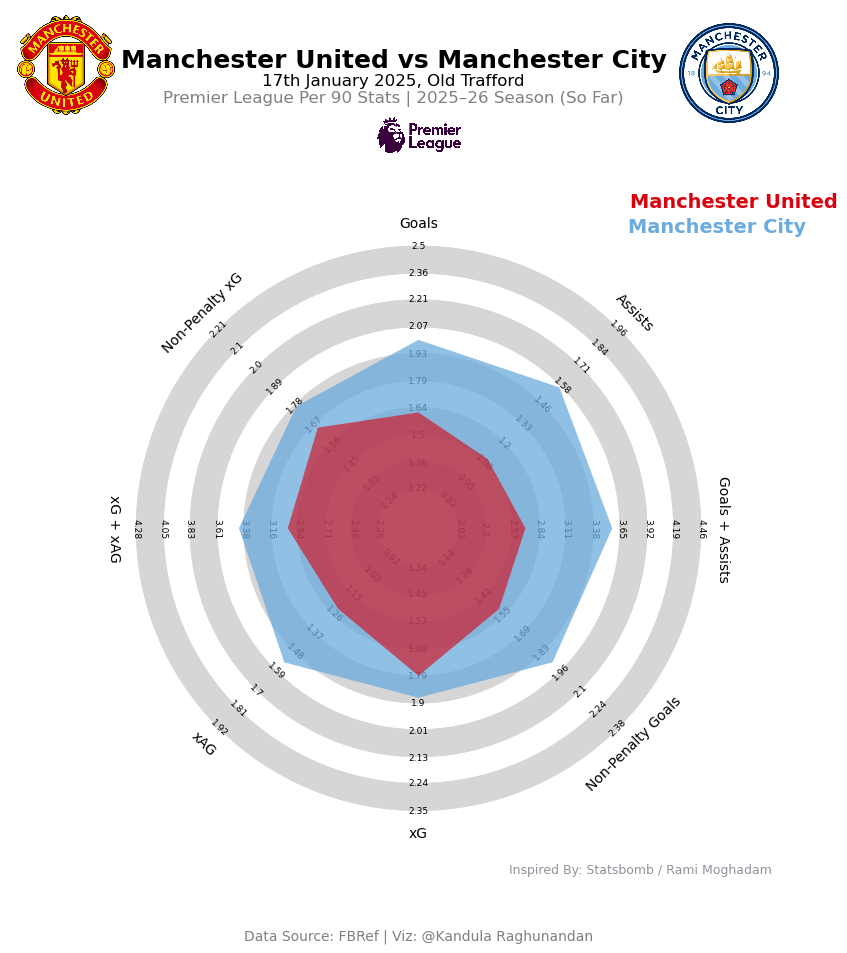

In [370]:
radar=Radar()
fig,ax=radar.plot_radar(ranges=ranges,params=params,values=values,radar_color=["#6CABDD","#DA020E"],alphas=[.75,.6],compare=True)

fig.text(0.5, 0.94,
         "Manchester United vs Manchester City",
         ha="center",
         fontsize=18,
         fontweight="bold")

fig.text(0.5, 0.922,
         "17th January 2025, Old Trafford",
         ha="center",
         fontsize=12,
         color="black")

fig.text(0.5, 0.905,
         "Premier League Per 90 Stats | 2025–26 Season (So Far)",
         ha="center",
         fontsize=12,
         color="gray")

# Left team
fig.text(0.67, 0.8,
         "Manchester United",
         ha="center",
         fontsize=14,
         fontweight="bold",
         color="#DA020E")

# Right team
fig.text(0.662, 0.775,
         "Manchester City",
         ha="center",
         fontsize=14,
         fontweight="bold",
         color="#6CABDD")

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Manchester United.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Manchester City.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/PREM LOGO (2).png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.2, xy=(0, 1.08))
add_logo(ax, away_logo, zoom=0.2, xy=(0.94, 1.07))
add_logo(ax,league_logo,zoom=0.03, xy=(0.5,0.99))

plt.text(
    0.5, -0.05, "Data Source: FBRef | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

fig.savefig("C:/Users/K Raghunandan/Analyst/Results/MUN_vs_MCI_17-01-2025_per90.png", bbox_inches='tight')